In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

sns.set_context("notebook", rc={"lines.linewidth": 3})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [ ]:
cate = "c2kegg"
pcc = ""
path_topo = "edge_entropy" 
gr = "metaEver"
#df_eigne_centrality = pd.read_csv("topolgy_property/c2_pathway_closeness_{gr}.txt")
df_eigne_centrality = pd.read_csv(f"{cate}{pcc}_pathway_{path_topo}_{gr}.txt",sep="\t",index_col=0)
#df_eigne_centrality.set_index("pathway",inplace=True)
df_eigne_centrality = df_eigne_centrality.T

In [53]:
df_ave= df_eigne_centrality.fillna(0).copy()

In [54]:
print(df_ave.shape)
df_ave

(186, 92)


sample,EA595473,EA595564,EA595565,EA595620,EA595621,EA595636,EA595660,EA595661,EA595679,EA632138,...,P66507-12A-Run1_S12_L001,P66511-02H-Run1_S26_L002,P66511-04B-Run1_S2_L001,P66511-04H-Run1_S7_L001,P66511-05F-Run1_S12_L001,P66511-06B-Run1_S14_L001,P66511-07G-Run1_S18_L002,P66511-08E-Run1_S22_L002,P66511-09G-Run1_S31_L002,P66511-10H-Run1_S5_L001
KEGG_N_GLYCAN_BIOSYNTHESIS,6.462551,6.397664,6.329231,5.874111,6.138336,6.252748,6.381643,6.463234,6.292907,6.397105,...,6.895160,6.362546,6.139036,6.395503,6.396891,6.236677,6.494365,6.292822,6.362532,6.078985
KEGG_OTHER_GLYCAN_DEGRADATION,2.573409,2.315437,2.573888,2.573751,2.578002,2.311931,2.800099,2.986900,2.575311,2.989560,...,1.583427,2.573381,2.800036,2.989117,1.988231,2.576217,2.793379,3.161280,2.564473,2.797585
KEGG_O_GLYCAN_BIOSYNTHESIS,1.578790,0.993396,0.995981,1.993462,0.999709,2.311891,2.805395,2.316880,2.802675,1.578741,...,3.214555,1.991778,0.997711,2.318389,1.580881,0.994352,1.992767,3.166077,2.582109,1.997439
KEGG_GLYCOSAMINOGLYCAN_DEGRADATION,2.578215,2.996844,2.987182,2.994446,3.163143,2.577456,2.577760,2.312804,3.261075,2.313014,...,3.168455,2.313512,2.994585,2.796170,2.313265,2.797123,2.573743,2.316335,1.991457,2.581569
KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE,0.978372,-0.000000,0.995718,1.573266,2.989708,2.986018,0.987946,0.976790,1.980751,-0.000000,...,0.999961,0.979245,-0.000000,0.984872,0.978142,0.982403,0.978578,2.572581,1.568475,1.568503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KEGG_ASTHMA,5.729053,5.678260,5.730556,5.597513,5.407695,5.706642,6.210206,5.805870,5.832544,5.704737,...,5.343952,5.782122,5.650932,5.782889,5.759030,5.703742,5.752770,5.760227,5.704325,5.623229
KEGG_AUTOIMMUNE_THYROID_DISEASE,7.060405,7.155847,6.923883,6.837339,6.734887,7.022066,7.336530,7.111802,7.209279,7.143063,...,6.567777,7.048913,6.986073,7.142296,7.133105,7.101411,7.149109,7.174399,7.133181,7.107073
KEGG_ALLOGRAFT_REJECTION,6.879947,6.976035,6.685302,6.694597,6.580332,6.860033,7.179292,6.927023,6.983283,6.950862,...,6.409451,6.867520,6.857589,6.950047,6.984669,6.904351,6.923363,7.008071,6.927821,6.932708
KEGG_GRAFT_VERSUS_HOST_DISEASE,6.855260,6.952996,6.684343,6.680254,6.550069,6.859457,7.024837,6.891634,6.926172,6.927368,...,6.409546,6.830615,6.844807,6.903653,6.972649,6.880086,6.887872,6.985480,6.903932,6.849201


In [55]:
df_cl = pd.read_csv("../leave_one_out/braun_data_clinical_data.csv")
df_os = pd.merge(df_ave.T.reset_index(),df_cl,how='left', left_on="sample", right_on="RNA_ID")
df_os.columns = ["index"] + df_os.columns.tolist()[1:]
df_os.shape

(92, 200)

In [56]:
from lifelines import CoxPHFitter
df_cox_os = pd.DataFrame()
for i in df_os.columns[1:-13]:
    df_os1 = df_os[[i]+['OS', 'OS_CNSR']]
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='OS', event_col='OS_CNSR')
        df_cox_os = pd.concat([df_cox_os,cph.summary])
    except:
        print("not working")
print("done")
df_cox_pfs = pd.DataFrame()
for i in df_os.columns[1:-13]:
    df_os1 = df_os[[i]+['PFS', 'PFS_CNSR']]
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='PFS', event_col='PFS_CNSR')
        df_cox_pfs = pd.concat([df_cox_pfs,cph.summary])
    except:
        print("not working")

done


In [57]:
df_cox_os[df_cox_os["p"]<0.05][["exp(coef)","p"]]

,exp(coef),p
covariate,,
KEGG_SPHINGOLIPID_METABOLISM,0.524074,0.024214
KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES,0.678277,0.018122
KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION,0.498607,0.012446
KEGG_BETA_ALANINE_METABOLISM,0.518151,0.029652
KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM,3.873485,0.027716
KEGG_LIMONENE_AND_PINENE_DEGRADATION,0.504219,0.031262
KEGG_PPAR_SIGNALING_PATHWAY,0.446146,0.033424
KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER_PYLORI_INFECTION,0.328585,0.035677


In [58]:
os_list = df_cox_os[df_cox_os["p"]<0.05].index.tolist()
pfs_list = df_cox_pfs[df_cox_pfs["p"]<0.05].index.tolist()
sign_list = list(set(os_list).intersection(pfs_list))
#sign_list = list(set(os_list).union(pfs_list))
print(len(os_list),len(pfs_list),len(sign_list))

8 8 4


In [59]:
os_list

['KEGG_SPHINGOLIPID_METABOLISM',
 'KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES',
 'KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION',
 'KEGG_BETA_ALANINE_METABOLISM',
 'KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM',
 'KEGG_LIMONENE_AND_PINENE_DEGRADATION',
 'KEGG_PPAR_SIGNALING_PATHWAY',
 'KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER_PYLORI_INFECTION']

In [60]:
pfs_list

['KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION',
 'KEGG_GLYCINE_SERINE_AND_THREONINE_METABOLISM',
 'KEGG_BETA_ALANINE_METABOLISM',
 'KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM',
 'KEGG_BUTANOATE_METABOLISM',
 'KEGG_LIMONENE_AND_PINENE_DEGRADATION',
 'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
 'KEGG_TIGHT_JUNCTION']

import scipy
plist = []
for i in sign_list:
    cb = df_os[df_os["Benefit"]=="CB"][i].tolist()
    ncb = df_os[df_os["Benefit"]=="NCB"][i].tolist()
    
    t_Pvalue = scipy.stats.ttest_ind(cb,ncb,\
                            equal_var=[scipy.stats.levene(cb,ncb)[1] > 0.05])[1]
    #print(t_Pvalue)
    if t_Pvalue < 0.05:
        plist.append(i)
print(len(plist))

 df_os.copy()[plist]

In [61]:
dfos_detail = pd.concat([df_os[df_os["Benefit"]=="CB"][os_list].mean(),df_os[df_os["Benefit"]=="NCB"][os_list].mean()],axis=1)
dfos_detail.columns = ["CB","NCB"]
print(dfos_detail)
dfos_detail.to_csv(f"{cate}_{pcc}_{path_topo}_{gr}_os_path.txt")

                                                          CB       NCB
KEGG_SPHINGOLIPID_METABOLISM                        3.964051  3.852664
KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES    0.876597  0.658500
KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION        3.572518  3.329290
KEGG_BETA_ALANINE_METABOLISM                        4.697788  4.420719
KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM             0.000000  0.083100
KEGG_LIMONENE_AND_PINENE_DEGRADATION                3.354906  3.186060
KEGG_PPAR_SIGNALING_PATHWAY                         5.990756  5.842727
KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER_...  6.310370  6.166110


In [62]:
dfos_detail = pd.concat([df_os[df_os["Benefit"]=="CB"][pfs_list].mean(),df_os[df_os["Benefit"]=="NCB"][pfs_list].mean()],axis=1)
dfos_detail.columns = ["CB","NCB"]
print(dfos_detail.shape)
print(dfos_detail)
dfos_detail.to_csv(f"{cate}_{pcc}_{path_topo}_{gr}_pfs_path.txt")

(8, 2)
                                                    CB       NCB
KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION  3.572518  3.329290
KEGG_GLYCINE_SERINE_AND_THREONINE_METABOLISM  5.213686  5.117882
KEGG_BETA_ALANINE_METABOLISM                  4.697788  4.420719
KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM       0.000000  0.083100
KEGG_BUTANOATE_METABOLISM                     5.498152  5.352824
KEGG_LIMONENE_AND_PINENE_DEGRADATION          3.354906  3.186060
KEGG_NUCLEOTIDE_EXCISION_REPAIR               4.857251  5.072590
KEGG_TIGHT_JUNCTION                           7.997436  7.952722


In [63]:
import math
def secline(alist):
    newlist = ""
    if len(alist) > 40:
        if len(alist.split("_")) > 2: 
            num = math.floor(len(alist.split("_"))/2)
            newlist += "_".join(alist.split("_")[:num])
            newlist +="\n"+ "_".join(alist.split("_")[num:])
    else:
        newlist = alist
    return newlist

In [64]:
print(len(os_list))
os_list

8


['KEGG_SPHINGOLIPID_METABOLISM',
 'KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES',
 'KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION',
 'KEGG_BETA_ALANINE_METABOLISM',
 'KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM',
 'KEGG_LIMONENE_AND_PINENE_DEGRADATION',
 'KEGG_PPAR_SIGNALING_PATHWAY',
 'KEGG_EPITHELIAL_CELL_SIGNALING_IN_HELICOBACTER_PYLORI_INFECTION']

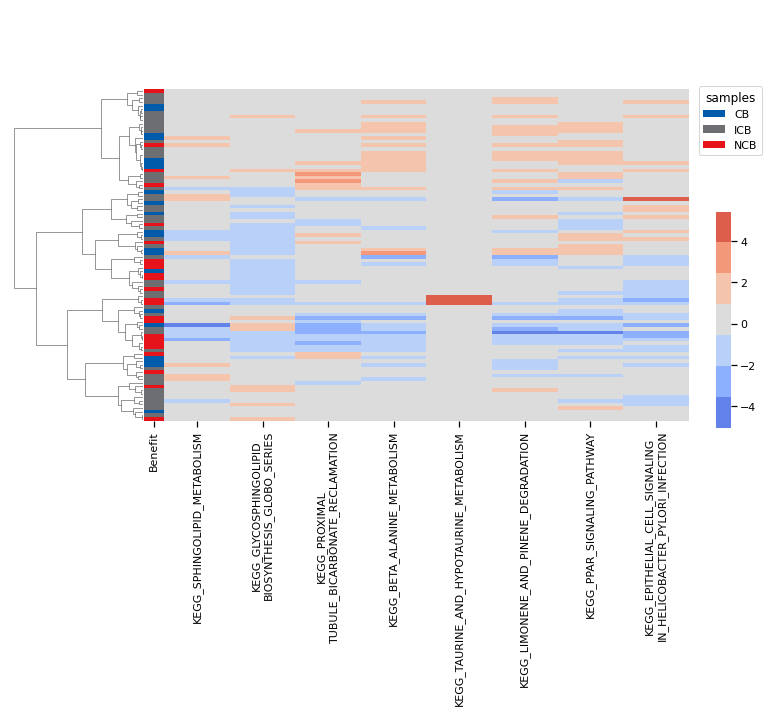

In [85]:
dc = {2:"#e40c69",1:"#2e3092",3:'#6d6e71'}
#####################################################################
df_aveplot = df_os.set_index("index").copy()[os_list[:]]
col_colors = df_os.set_index("index")["Benefit"].copy().replace("ICB","#6d6e71")\
                    .replace("NCB","#E7131A").replace("CB","#005baa")
df_aveplot.columns = [secline(i) for i in df_aveplot.columns.tolist()]
df_aveplot.fillna(0,inplace=True)
#####################################################################


g1 = sns.clustermap(df_aveplot, cmap=sns.color_palette("coolwarm", 7),col_cluster=False,yticklabels=False,
               method="ward",metric="cosine",row_colors= col_colors,z_score=1)#,col_cluster=False)
plt.setp(g1.ax_heatmap.get_xticklabels(), rotation=90) 
ax = g1.ax_heatmap
ax.set_ylabel("")
g1.ax_cbar.set_position((1, .4, .02, .3))

dic = {"ICB":"#6d6e71","NCB":"#E7131A","CB":"#005baa"}

for label in ["CB","ICB","NCB"]:
    g1.ax_col_dendrogram.bar(0, 0, color=dic[label], label=label, linewidth=0)
l1 = g1.ax_col_dendrogram.legend(title='samples', loc="best", ncol=1, bbox_to_anchor=(1.15, 0.10))

plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_os.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

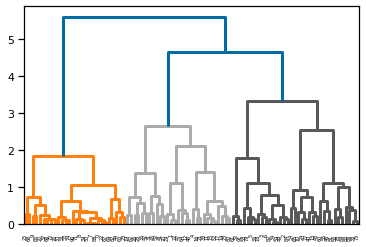

In [86]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy import stats

linkage_data = linkage(pdist(stats.zscore(df_aveplot), 'cosine'), method='ward', metric='euclidean')
dn = dendrogram(linkage_data)
plt.show() 

[1 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 1 2 2 2 2 2 2
 1 2 1 2 2 2 2 1 2 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 2 1 1 1
 1 2 1 2 2 2 2 2 2 2 2 1 2 1 1 2 1 2]
0.0052193873058957365
c1_CB: 7 c1_ICB: 17 c1_NCB: 4
c2_CB: 14 c2_ICB: 30 c2_NCB: 20
False


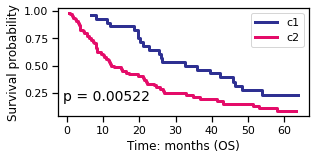

In [87]:
from scipy.cluster.hierarchy import fcluster
from sksurv.compare import compare_survival
import numpy as np

fl = fcluster(linkage_data,2,criterion='maxclust')
print(fl)

def swapPositions(lis):
    newlis = []
    for i in lis:
        if i == 1:
            newlis.append(2)
        if i == 2:
            newlis.append(1)
    return newlis
df_os["cres"] = fl
#df_os["cres"] =swapPositions(fl)


y = df_os[["OS_CNSR","OS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")
group_indicator = df_os["cres"]
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)


#OS survival analysis
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 2))
df_os["OS_CNSR"] = df_os["OS_CNSR"]==1

for i in set(fl):
    speci_df = df_os[df_os["cres"]==i]
    print(f"c{i}_CB:",speci_df["Benefit"].tolist().count("CB"),
         f"c{i}_ICB:",speci_df["Benefit"].tolist().count("ICB"),
         f"c{i}_NCB:",speci_df["Benefit"].tolist().count("NCB"),)
    time, survival_prob, conf_int = kaplan_meier_estimator(
        speci_df["OS_CNSR"], \
        speci_df["OS"], conf_type="log-log"
)
    plt.step(time, survival_prob, where="post", label=f"c{i}",color=dc[i])
    #plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")

ax.text(0.02, 0.25, "p = "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,verticalalignment='top')
print(pvalue< 0.00001)
#ax.text(0.02, 0.15, "p < 0.00001", transform=ax.transAxes, fontsize=14, verticalalignment='top')


plt.ylabel("Survival probability")
plt.xlabel("Time: months (OS)")
plt.legend(loc="best")  
plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_os_onlyosscluster.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

In [88]:
print(len(pfs_list))
pfs_list

8


['KEGG_PROXIMAL_TUBULE_BICARBONATE_RECLAMATION',
 'KEGG_GLYCINE_SERINE_AND_THREONINE_METABOLISM',
 'KEGG_BETA_ALANINE_METABOLISM',
 'KEGG_TAURINE_AND_HYPOTAURINE_METABOLISM',
 'KEGG_BUTANOATE_METABOLISM',
 'KEGG_LIMONENE_AND_PINENE_DEGRADATION',
 'KEGG_NUCLEOTIDE_EXCISION_REPAIR',
 'KEGG_TIGHT_JUNCTION']

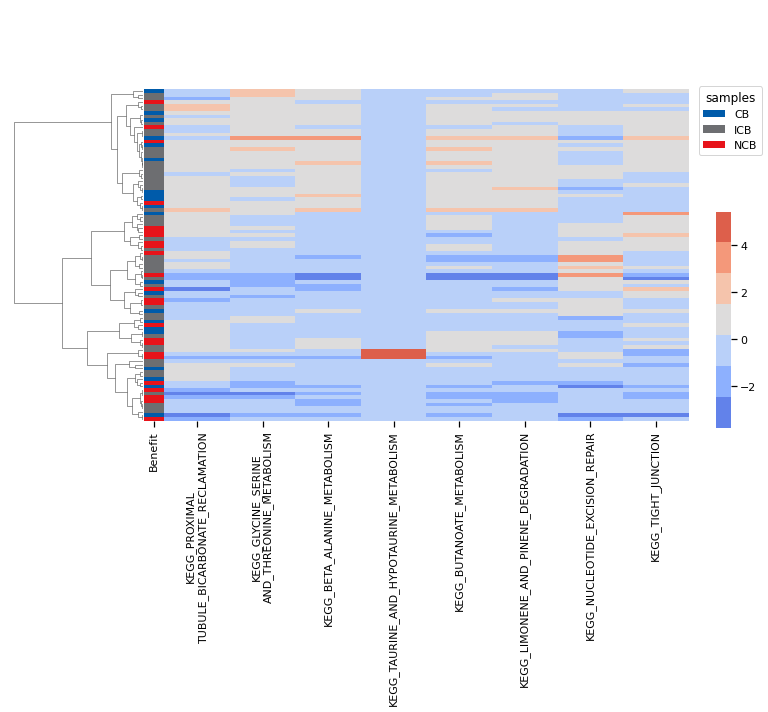

In [89]:
#####################################################################
df_aveplotpfs = df_os.set_index("index").copy()[pfs_list[:]]
col_colors = df_os.set_index("index")["Benefit"].copy().replace("ICB","#6d6e71")\
                    .replace("NCB","#E7131A").replace("CB","#005baa")
df_aveplotpfs.columns = [secline(i) for i in df_aveplotpfs.columns.tolist()]
df_aveplotpfs.fillna(0,inplace=True)
#####################################################################

g1 = sns.clustermap(df_aveplotpfs, cmap=sns.color_palette("coolwarm", 7),col_cluster=False,yticklabels=False,
               method="ward",metric="cosine",row_colors= col_colors,z_score=1)#,col_cluster=False)
plt.setp(g1.ax_heatmap.get_xticklabels(), rotation=90) 
ax = g1.ax_heatmap
ax.set_ylabel("")
g1.ax_cbar.set_position((1, .4, .02, .3))

dic = {"ICB":"#6d6e71","NCB":"#E7131A","CB":"#005baa"}

for label in ["CB","ICB","NCB"]:
    g1.ax_col_dendrogram.bar(0, 0, color=dic[label], label=label, linewidth=0)
l1 = g1.ax_col_dendrogram.legend(title='samples', loc="best", ncol=1, bbox_to_anchor=(1.15, 0.10))

plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_pfs.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

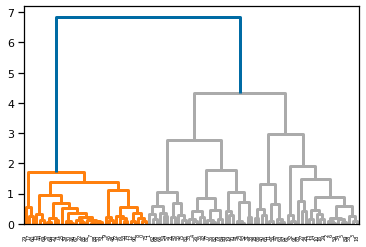

In [90]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy import stats

linkage_data = linkage(pdist(stats.zscore(df_aveplotpfs), 'cosine'), method='ward', metric='euclidean')
dn = dendrogram(linkage_data)
plt.show() 

fl = fcluster(linkage_data,2,criterion='maxclust')

df_os["cres"] = fl
#df_os["cres"] =swapPositions(fl)

0.03772834894532835
c1_CB: 10 c1_ICB: 20 c1_NCB: 4
c2_CB: 11 c2_ICB: 27 c2_NCB: 20


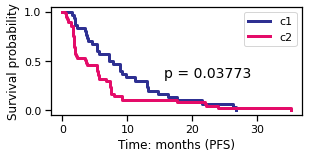

In [91]:
y = df_os[["PFS_CNSR","PFS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")
group_indicator = df_os["cres"]
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 2))
df_os["PFS_CNSR"] = df_os["PFS_CNSR"]==1

for i in set(fl):
    speci_df = df_os[df_os["cres"]==i]
    print(f"c{i}_CB:",speci_df["Benefit"].tolist().count("CB"),
         f"c{i}_ICB:",speci_df["Benefit"].tolist().count("ICB"),
         f"c{i}_NCB:",speci_df["Benefit"].tolist().count("NCB"),)
    time, survival_prob, conf_int = kaplan_meier_estimator(
        speci_df["PFS_CNSR"], \
        speci_df["PFS"], conf_type="log-log"
)
    plt.step(time, survival_prob, where="post", label=f"c{i}",color=dc[i])
    #plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")

ax.text(0.45, 0.45, "p = "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


plt.ylabel("Survival probability")
plt.xlabel("Time: months (PFS)")
plt.legend(loc="best")  
plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_pfs_onlypfscluster.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

from scipy.cluster.hierarchy import fcluster

fl = fcluster(linkage_data,2,criterion='maxclust')
print(fl)
df_os["cres"] = fl
#df_os["cres"] = [1 if i != 2 else i for i in fl ]
#print(df_sns["cres"]!=3)
set(df_os["cres"])

from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from sksurv.compare import compare_survival
import numpy as np
pdf1 = df_os.copy()
print(pdf1.shape)
y = df_os[["OS_CNSR","OS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")

#df_os_fl[df_os_fl[tar]>df_os[tar].quantile(0.65)] = "higher"
group_indicator = pdf1["cres"]
print(len(group_indicator))
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

ix = pdf1['cres'] == 2

ax = plt.subplot(111)

kmf_control = KaplanMeierFitter()
#print(pdf1.loc[ix]["OS"])
ax = kmf_control.fit(pdf1.loc[ix]["OS"], pdf1.loc[ix]["OS_CNSR"], label='c2').plot_survival_function(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(pdf1.loc[~ix]["OS"], pdf1.loc[~ix]["OS_CNSR"], label='c1&cn').plot_survival_function(ax=ax)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.7, 0.35, "logrank test\np value: "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.title("OS")
plt.tight_layout()

from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from sksurv.compare import compare_survival
import numpy as np
pdf1 = df_os.copy()
print(pdf1.shape)
y = df_os[["PFS_CNSR","PFS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")

#df_os_fl[df_os_fl[tar]>df_os[tar].quantile(0.65)] = "higher"
group_indicator = pdf1["cres"]
print(len(group_indicator))
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

ix = pdf1['cres'] == 2

ax = plt.subplot(111)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(pdf1.loc[ix]["PFS"], pdf1.loc[ix]["PFS_CNSR"], label='c2').plot_survival_function(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(pdf1.loc[~ix]["PFS"], pdf1.loc[~ix]["OS_CNSR"], label='c1&cn').plot_survival_function(ax=ax)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.7, 0.35, "logrank test\np value: "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.title("PFS")
plt.tight_layout()